In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

main_folder = "/content/drive/MyDrive/MNIold2/train"  # Replace this with your actual folder path

# Define the path to the output folder where the 2D tensors will be saved
output_folder_train = "/content/drive/MyDrive/MNIold2/model_train"  # Replace this with your actual output folder path

def nifti_to_tensor(image_path):
    # Load the NIFTI image
    image = nib.load(image_path).get_fdata()

    # Get the number of slices in the z-axis
    num_slices = image.shape[2]

    # Select the 5th slice above the center slice
    center_slice = num_slices // 2

    # Extract the selected slice
    tensor = image[:, :, center_slice]

    # Normalize the tensor to the range [0, 1]
    tensor = (tensor - np.min(tensor)) / (np.max(tensor) - np.min(tensor))

    return tensor

# Iterate over each patient folder
for patient_folder in os.listdir(main_folder):
    # Get a list of all files in the current patient's folder
    files = os.listdir(os.path.join(main_folder, patient_folder))

    # Find the T1 MRI, Flair MRI, and PET scan based on their filenames
    for file in files:
        if "T1w" in file:
            t1_path = os.path.join(main_folder, patient_folder, file)
        elif "FLAIR" in file:
            flair_path = os.path.join(main_folder, patient_folder, file)
        elif "pet" in file:
            pet_path = os.path.join(main_folder, patient_folder, file)

    # Convert each image to a 2D tensor
    t1_tensor = nifti_to_tensor(t1_path)
    flair_tensor = nifti_to_tensor(flair_path)
    pet_tensor = nifti_to_tensor(pet_path)

    # Concatenate the T1 MRI and FLAIR MRI tensors along the channel dimension
    # Concatenate the T1 MRI and FLAIR MRI tensors along the channel dimension
    input_tensor = np.concatenate((t1_tensor[..., np.newaxis], flair_tensor[..., np.newaxis]), axis=2)


    # Convert the 2-channel image back to a grayscale image
    input_tensor = np.mean(input_tensor, axis=2)
    pet_tensor = np.mean(pet_tensor[..., np.newaxis], axis=2)  # Use axis 0 for height and width

   # Save the concatenated tensor and the PET tensor as images to the output folder
    plt.imsave(os.path.join(output_folder_train, f"{patient_folder}_input.png"), input_tensor, cmap='gray')
    plt.imsave(os.path.join(output_folder_train, f"{patient_folder}_target.png"), pet_tensor, cmap='gray')


print("All input and target images (5 slices from the center) have been successfully saved to the output folder.")


All input and target images (5 slices from the center) have been successfully saved to the output folder.


In [ ]:
print(input_tensor.shape)
print(pet_tensor.shape)

(207, 243)
(207, 243)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

main_folder = "/content/drive/MyDrive/MNIold2/test"  # Replace this with your actual folder path

# Define the path to the output folder where the 2D tensors will be saved
output_folder_train = "/content/drive/MyDrive/MNIold2/model_test"  # Replace this with your actual output folder path

def nifti_to_tensor(image_path):
    # Load the NIFTI image
    image = nib.load(image_path).get_fdata()

    # Get the number of slices in the z-axis
    num_slices = image.shape[2]

    # Select the 5th slice above the center slice
    center_slice = num_slices // 2

    # Extract the selected slice
    tensor = image[:, :, center_slice]

    # Normalize the tensor to the range [0, 1]
    tensor = (tensor - np.min(tensor)) / (np.max(tensor) - np.min(tensor))

    return tensor

# Iterate over each patient folder
for patient_folder in os.listdir(main_folder):
    # Get a list of all files in the current patient's folder
    files = os.listdir(os.path.join(main_folder, patient_folder))

    # Find the T1 MRI, Flair MRI, and PET scan based on their filenames
    for file in files:
        if "T1w" in file:
            t1_path = os.path.join(main_folder, patient_folder, file)
        elif "FLAIR" in file:
            flair_path = os.path.join(main_folder, patient_folder, file)
        elif "pet" in file:
            pet_path = os.path.join(main_folder, patient_folder, file)

    # Convert each image to a 2D tensor
    t1_tensor = nifti_to_tensor(t1_path)
    flair_tensor = nifti_to_tensor(flair_path)
    pet_tensor = nifti_to_tensor(pet_path)

    # Concatenate the T1 MRI and FLAIR MRI tensors along the channel dimension
    # Concatenate the T1 MRI and FLAIR MRI tensors along the channel dimension
    input_tensor = np.concatenate((t1_tensor[..., np.newaxis], flair_tensor[..., np.newaxis]), axis=2)


    # Convert the 2-channel image back to a grayscale image
    input_tensor = np.mean(input_tensor, axis=2)
    pet_tensor = np.mean(pet_tensor[..., np.newaxis], axis=2)  # Use axis 0 for height and width

   # Save the concatenated tensor and the PET tensor as images to the output folder
    plt.imsave(os.path.join(output_folder_train, f"{patient_folder}_input.png"), input_tensor, cmap='gray')
    plt.imsave(os.path.join(output_folder_train, f"{patient_folder}_target.png"), pet_tensor, cmap='gray')


print("All input and target images have been successfully saved to the output folder.")


All input and target images have been successfully saved to the output folder.


In [ ]:
# import tensorflow as tf
# BUFFER_SIZE = 52
# BATCH_SIZE = 1
# # Get lists of T1, FLAIR, and PET scan file paths
# input_files = sorted(tf.io.gfile.glob(os.path.join('/content/drive/MyDrive/MNIold/model_train', '*_input.png')))
# target_files = sorted(tf.io.gfile.glob(os.path.join('/content/drive/MyDrive/MNIold/model_train', '*_target.png')))

# # Make sure the lists of T1, FLAIR, and PET scan file paths have the same length
# assert len(input_files) == len(target_files)

# # Create a dataset of tuples, where each tuple is (T1 path, FLAIR path, PET path) for a single patient
# file_paths_dataset_train = tf.data.Dataset.from_tensor_slices((input_files, target_files))

# # Shuffle the dataset
# file_paths_dataset_train = file_paths_dataset_train.shuffle(BUFFER_SIZE)

# # Batch the dataset
# file_paths_dataset_train = file_paths_dataset_train.batch(BATCH_SIZE)


In [ ]:
import tensorflow as tf

BUFFER_SIZE = 52
BATCH_SIZE = 1

# Get lists of T1, FLAIR, and PET scan file paths
input_files = sorted(tf.io.gfile.glob(os.path.join('/content/drive/MyDrive/MNIold2/model_train', '*_input.png')))
target_files = sorted(tf.io.gfile.glob(os.path.join('/content/drive/MyDrive/MNIold2/model_train', '*_target.png')))

# Make sure the lists of T1, FLAIR, and PET scan file paths have the same length
assert len(input_files) == len(target_files)

# Create a dataset of tuples, where each tuple is (T1 path, FLAIR path, PET path) for a single patient
file_paths_dataset_train = tf.data.Dataset.from_tensor_slices((input_files, target_files))

# Define a function to load and preprocess the images
def load_and_preprocess_images(input_path, target_path):
    # Load the images
    input_image = tf.io.read_file(input_path)
    target_image = tf.io.read_file(target_path)

    # Decode the images
    input_image = tf.image.decode_png(input_image, channels=1)
    target_image = tf.image.decode_png(target_image, channels=1)

    # Convert the images to float32 and normalize to [0, 1]
    input_image = tf.image.convert_image_dtype(input_image, tf.float32)
    target_image = tf.image.convert_image_dtype(target_image, tf.float32)

    return input_image, target_image

# Apply the function to the dataset
file_paths_dataset_train = file_paths_dataset_train.map(load_and_preprocess_images)

# Shuffle the dataset
file_paths_dataset_train = file_paths_dataset_train.shuffle(BUFFER_SIZE)

# Batch the dataset
file_paths_dataset_train = file_paths_dataset_train.batch(BATCH_SIZE)

# Prefetch the dataset
file_paths_dataset_train = file_paths_dataset_train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
# Get lists of T1, FLAIR, and PET scan file paths for testing data
input_files_test = sorted(tf.io.gfile.glob(os.path.join('/content/drive/MyDrive/MNIold2/model_test', '*_input.png')))
target_files_test = sorted(tf.io.gfile.glob(os.path.join('/content/drive/MyDrive/MNIold2/model_test', '*_target.png')))

# Make sure the lists of T1, FLAIR, and PET scan file paths have the same length
assert len(input_files_test) == len(target_files_test)

# Create a dataset of tuples, where each tuple is (T1 path, FLAIR path, PET path) for a single patient
file_paths_dataset_test = tf.data.Dataset.from_tensor_slices((input_files_test, target_files_test))

# Apply the function to the dataset
file_paths_dataset_test = file_paths_dataset_test.map(load_and_preprocess_images)

# Batch the dataset
file_paths_dataset_test = file_paths_dataset_test.batch(BATCH_SIZE)

# Prefetch the dataset
file_paths_dataset_test = file_paths_dataset_test.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result


In [ ]:
# Assuming OUTPUT_CHANNELS is set to 3 (for RGB images)
OUTPUT_CHANNELS = 2

def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result



In [ ]:
print(input_tensor.shape)


(207, 243)


In [ ]:
# Add an extra dimension to represent the batch size and channels
input_tensor = tf.expand_dims(input_tensor, 0)  # Add batch size dimension
input_tensor = tf.expand_dims(input_tensor, -1)  # Add channel dimension

# Define the number of filters and the size of the filters
filters = 64
filter_size = 4

# Create the downsampling model
down_model = downsample(filters, filter_size)

# Now apply the downsampling model to the input image
down_result = down_model(input_tensor)

print(down_result.shape)


(1, 104, 122, 64)


In [ ]:
up_model = upsample(3, 4)
up_result = up_model(down_result)

# Crop the output to the desired size
up_result = up_result[:, :207, :243, :]
print (up_result.shape)

(1, 207, 243, 3)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Concatenate, Conv2DTranspose, Conv2D

def Generator():
    inputs = Input(shape=[207, 243, 1])  # Adjusted the input shape to match your data

    down_stack = [
      downsample(64, 4, apply_batchnorm=False),  # (batch_size, 104, 122, 64)
      downsample(128, 4),  # (batch_size, 52, 61, 128)
      downsample(256, 4),  # (batch_size, 26, 31, 256)
      downsample(512, 4),  # (batch_size, 13, 16, 512)
      downsample(512, 4),  # (batch_size, 7, 8, 512)
      downsample(512, 4),  # (batch_size, 4, 4, 512)
      downsample(512, 4),  # (batch_size, 2, 2, 512)
    ]

    up_stack = [
      upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
      upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
      upsample(512, 4, apply_dropout=True),  # (batch_size, 16, 16, 1024)
      upsample(512, 4),  # (batch_size, 32, 32, 1024)
      upsample(256, 4),  # (batch_size, 64, 64, 512)
      upsample(128, 4),  # (batch_size, 128, 128, 256)
      upsample(64, 4),   # (batch_size, 256, 256, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = Conv2DTranspose(1, 4, strides=2, padding='same',  # Changed the number of output channels to 1
                           kernel_initializer=initializer,
                           activation='tanh')  # (batch_size, 512, 512, 1)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = x[:, :skip.shape[1], :skip.shape[2], :]  # Crop x to the shape of skip
        x = Concatenate()([x, skip])

    x = last(x)



    # Add a final Conv2D layer to adjust the dimensions
    final = Conv2D(1, 1, strides=1, padding='same',
                  kernel_initializer=initializer,
                  activation='tanh')  # (batch_size, 208, 244, 1)

    x = final(x)

    # Resize the output tensor to the desired shape
    x = tf.image.resize(x, [207, 243])

    return tf.keras.Model(inputs=inputs, outputs=x)



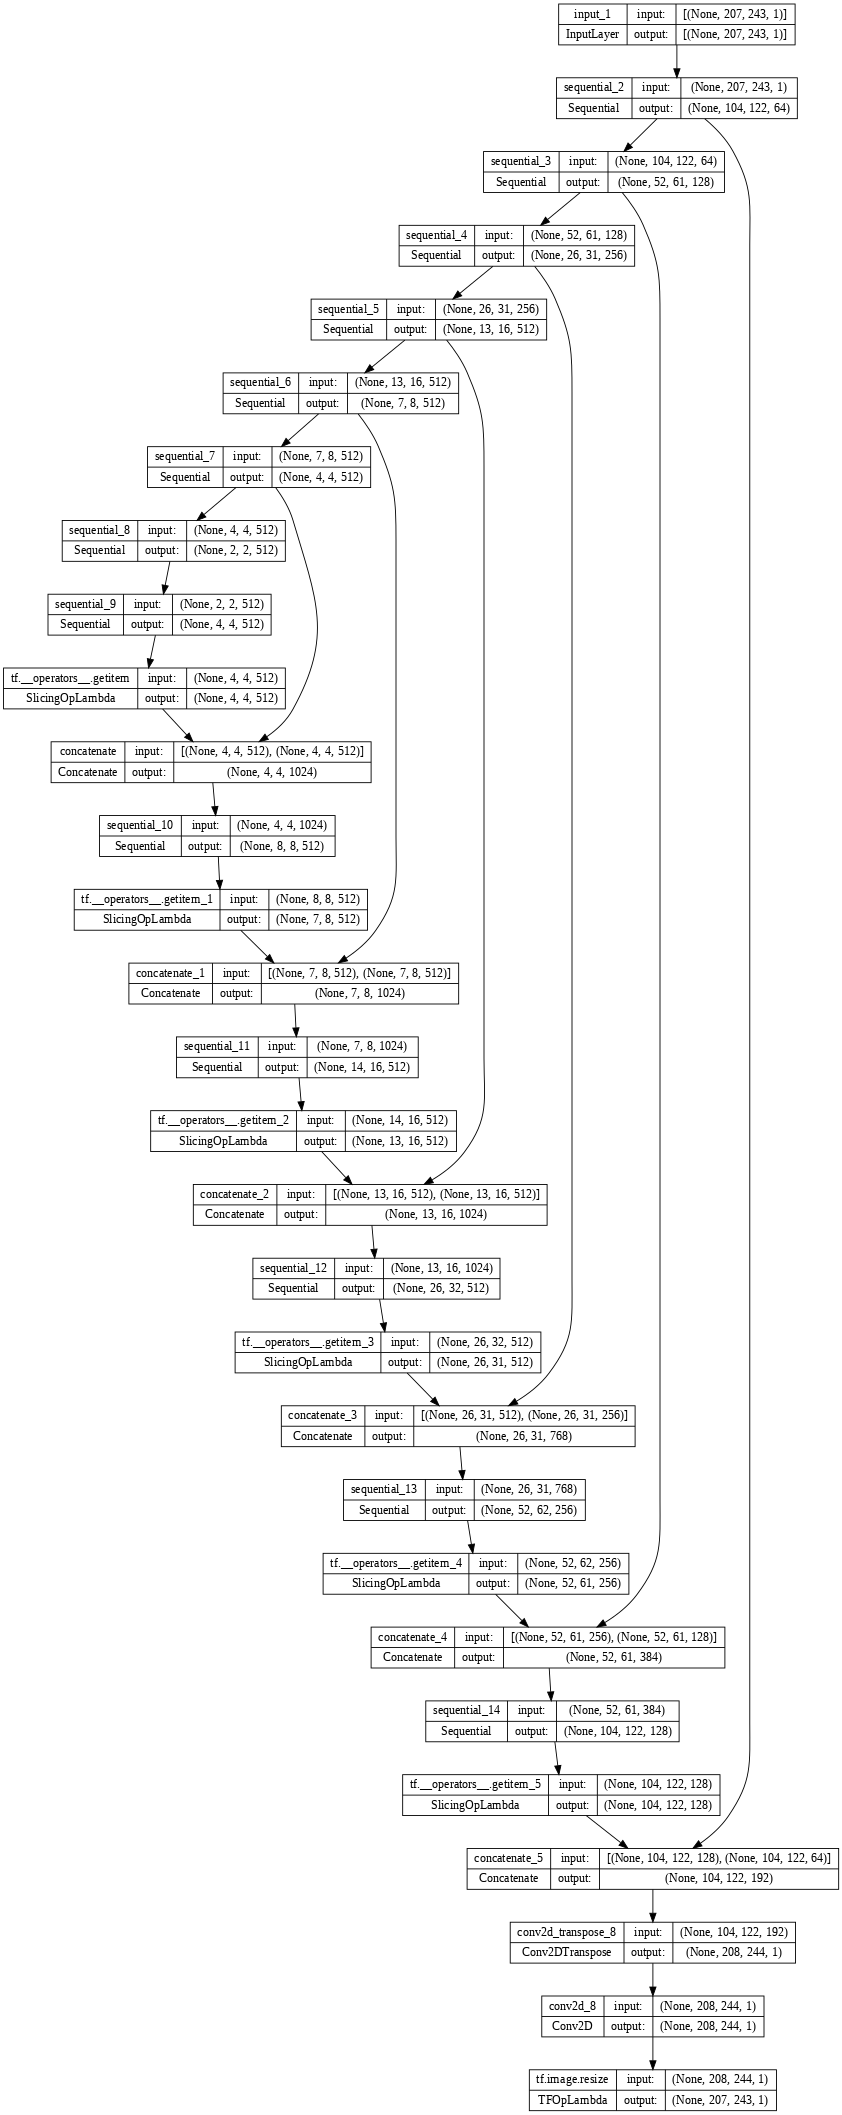

In [ ]:

generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

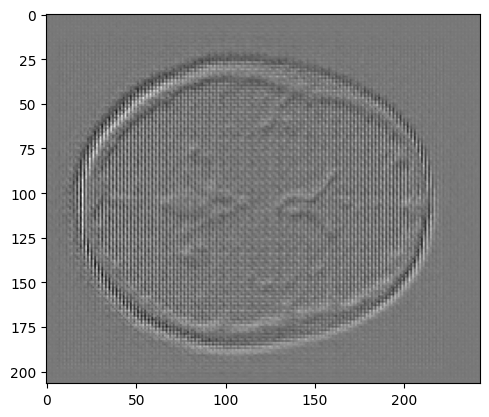

In [ ]:
# Instantiate the generator model
generator = Generator()


# Get the output of the generator
output = generator(input_tensor)

# The output is a 4D tensor (batch_size, height, width, channels)
# We can visualize the first image in the batch
gen_output = output[0, :, :, 0]

# Use matplotlib to visualize the image
import matplotlib.pyplot as plt
plt.imshow(gen_output, cmap='gray')
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Assume that 'output_tensor' is the output from your generator
# # Remove batch dimension and convert tensor to numpy array for plotting
# output_image = output_tensor[0].numpy()

# # Since the output image is in the range [-1, 1], we bring it back to the range [0, 1]
# # output_image = (output_image + 1) / 2.0

# # Plot the output image
# plt.imshow(output_image, cmap='gray')
# plt.show()


In [ ]:
LAMBDA = 100
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output, target):
    # GAN loss
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # Mean absolute error (L1 loss)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    # Total generator loss
    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss


In [ ]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[207, 243, 1], name='input_image')
  tar = tf.keras.layers.Input(shape=[207, 243, 1], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 207, 243, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 104, 122, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 52, 61, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 26, 31, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 28, 33, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 25, 30, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 27, 32, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 24, 28, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)


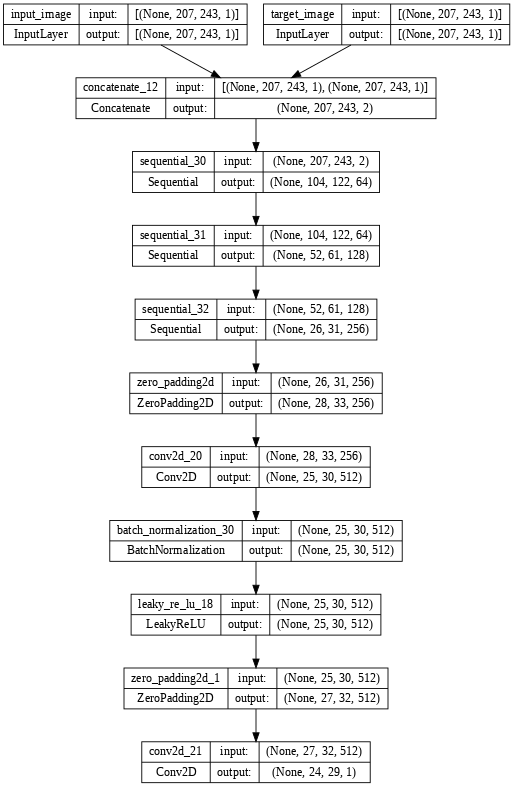

In [ ]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

In [ ]:
# Print the shape of the output tensor
print(input_tensor.shape)
pet_tensor = tf.expand_dims(pet_tensor, axis=-1)  # Using TensorFlow
pet_tensor = tf.expand_dims(pet_tensor, axis=0)  # Using TensorFlow

gen_output = tf.expand_dims(gen_output, axis=-1)  # Using TensorFlow
gen_output = tf.expand_dims(gen_output, axis=0)  # Using TensorFlow

print(pet_tensor.shape)
print(gen_output.shape)


(1, 207, 243, 1)
(1, 207, 243, 1)
(1, 207, 243, 1)


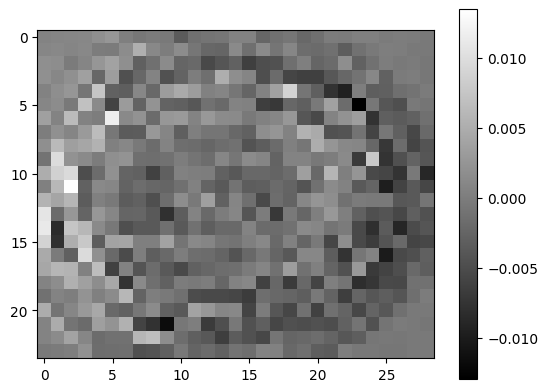

In [ ]:
import matplotlib.pyplot as plt

# Assume 'generator' and 'discriminator' are your defined models
# Assume 'input_image' and 'target_image' are your input data

# Generate an image with your generator
# gen_output = discriminator([input_tensor, pet_tensor], training=False)

# Pass the generated image and the target image through the discriminator
disc_out = discriminator([input_tensor, gen_output], training=False)

# The discriminator output is a 4D tensor: (batch_size, height, width, channels)
# We can take the mean over the batch and channels to get a 2D array
disc_out_mean = tf.reduce_mean(disc_out, axis=[0, 3])

# Plot the output
plt.imshow(disc_out_mean, cmap='gray')
plt.colorbar()
plt.show()


In [ ]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

# Define the optimizers
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

# Instantiate the generator and the discriminator
generator = Generator()
discriminator = Discriminator()
def count_parameters(layer):
    num_params = 0
    for weight in layer.trainable_weights:
        num_params += tf.reduce_prod(weight.shape)
    return num_params

# Example usage:
generator = Generator()  # Assuming you've defined your generator model
discriminator = Discriminator()  # Assuming you've defined your discriminator model

total_gen_params = sum(count_parameters(layer) for layer in generator.layers)
total_disc_params = sum(count_parameters(layer) for layer in discriminator.layers)

print(f"Total generator parameters: {total_gen_params}")
print(f"Total discriminator parameters: {total_disc_params}")


Total generator parameters: 48641539
Total discriminator parameters: 2764545


In [ ]:
def generate_images(model, test_input, tar):
    # Generate a prediction from the model
    prediction = model(test_input, training=True)

    # Create a new figure
    plt.figure(figsize=(15, 15))

    # Create a list of the input, target, and prediction images
    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    # Loop over each image in the display list
    for i in range(3):
        # Create a subplot for each image
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # Display the image
        # If your images are not in the range [0, 1], you might need to adjust this line
        plt.imshow(display_list[i] * 0.5 + 0.5, cmap = 'gray')
        plt.axis('off')
    plt.show()


In [ ]:
from IPython.display import clear_output
import time

train_losses = []

@tf.function
def train_step(input_image, target, step):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

        train_losses.append(gen_total_loss)

    generator_gradients = gen_tape.gradient(gen_total_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))




In [ ]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow as tf

def fit(train_ds, steps, test_ds):
    example_input, example_target = next(iter(test_ds.take(1)))
    start = time.time()

    # Initialize empty lists to store losses
    generator_losses = []
    discriminator_losses = []
    training_mse_values = []  # To store training MSE
    training_mae_values = []  # To store training MAE

    for step, (input_image, target) in enumerate(train_ds.repeat().take(steps)):
        # Every 20 steps: clear the display and run generate_images to show the progress
        if step % 20 == 0:
            if step != 0:
                print(f'\nTime taken for 20 steps: {time.time() - start:.2f} sec')
            start = time.time()

            # Clear the previous output images
            clear_output(wait=True)

            # Assuming that generate_images is a function you've defined to display images
            generate_images(generator, example_input, example_target)
            print(f"\nStep: {step // 20}")

            # Calculate MSE and MAE on training dataset
            gen_output = generator(input_image, training=False)
            mse = tf.keras.losses.MeanSquaredError()
            mae = tf.keras.losses.MeanAbsoluteError()
            training_mse = mse(target, gen_output).numpy()
            training_mae = mae(target, gen_output).numpy()
            training_mse_values.append(training_mse)
            training_mae_values.append(training_mae)

            # Print training MSE and MAE
            print(f"Training MSE: {training_mse:.4f}")
            print(f"Training MAE: {training_mae:.4f}")

        # Training step
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            gen_output = generator(input_image, training=True)

            disc_real_output = discriminator([input_image, target], training=True)
            disc_generated_output = discriminator([input_image, gen_output], training=True)

            gen_loss, _, _ = generator_loss(disc_generated_output, gen_output, target)
            disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

        # Update generator and discriminator weights
        generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
        discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

        # Append losses to lists
        generator_losses.append(gen_loss.numpy())
        discriminator_losses.append(disc_loss.numpy())


        # Every 10 steps print a dot (.)
        if (step + 1) % 10 == 0:
            print('.', end='', flush=True)

    # Plot final learning curves
    plot_learning_curves(generator_losses, discriminator_losses)

def plot_learning_curves(generator_losses, discriminator_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(generator_losses, label='Generator Loss', color='blue')
    plt.plot(discriminator_losses, label='Discriminator Loss', color='red')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title('GAN Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()



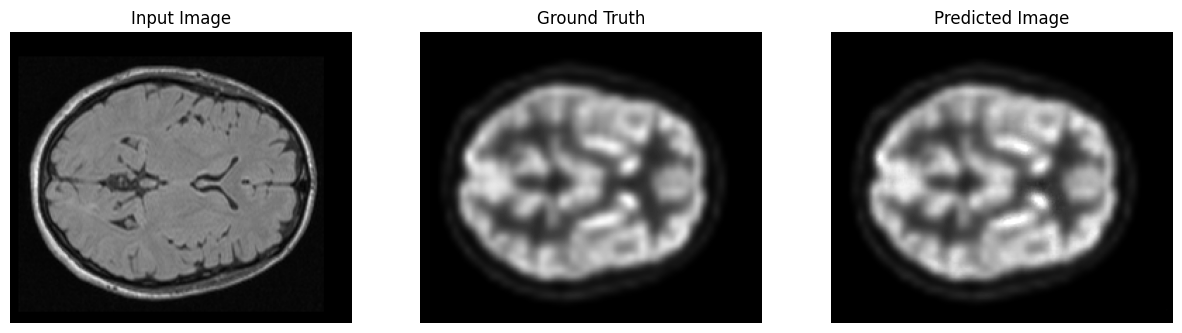


Step: 499
Training MSE: 0.0001
Training MAE: 0.0037
..

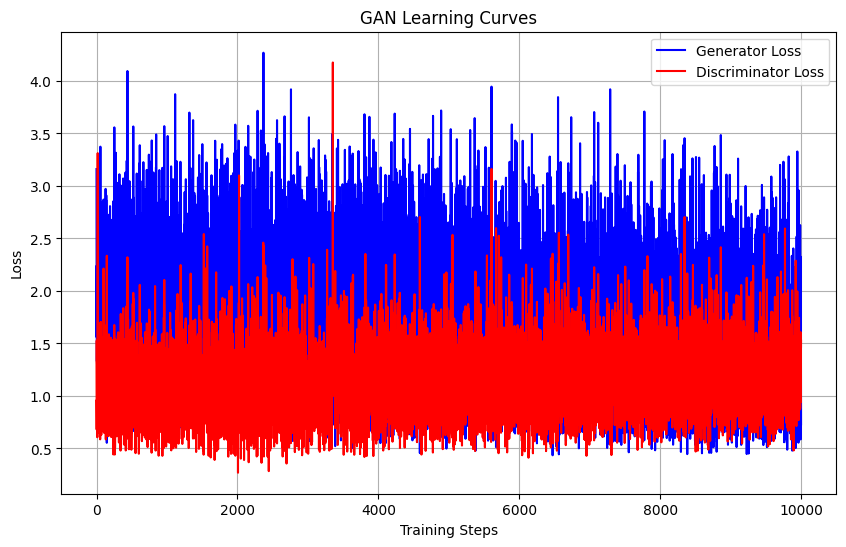

In [ ]:
# Call the modified fit function
fit(file_paths_dataset_train, 10000, file_paths_dataset_test)

In [ ]:
# import time
# import matplotlib.pyplot as plt
# from IPython.display import clear_output

# def fit(train_ds, steps, test_ds):
#     example_input, example_target = next(iter(test_ds.take(1)))
#     start = time.time()

#     # Initialize empty lists to store losses
#     generator_losses = []
#     discriminator_losses = []
#     training_mse_values = []  # To store training MSE
#     training_mae_values = []  # To store training MAE

#     for step, (input_image, target) in enumerate(train_ds.repeat().take(steps)):
#         # Every 20 steps: clear the display and run generate_images to show the progress
#         if step % 20 == 0:
#             if step != 0:
#                 print(f'\nTime taken for 20 steps: {time.time() - start:.2f} sec')
#             start = time.time()

#             # Clear the previous output images
#             clear_output(wait=True)

#             # Assuming that generate_images is a function you've defined to display images
#             generate_images(generator, example_input, example_target)
#             print(f"\nStep: {step // 20}")

#         # Training step
#         with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#             gen_output = generator(input_image, training=True)

#             disc_real_output = discriminator([input_image, target], training=True)
#             disc_generated_output = discriminator([input_image, gen_output], training=True)

#             gen_loss, _, _ = generator_loss(disc_generated_output, gen_output, target)
#             disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

#         # Update generator and discriminator weights
#         generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
#         discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#         generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
#         discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

#         # Append losses to lists
#         generator_losses.append(gen_loss.numpy())
#         discriminator_losses.append(disc_loss.numpy())

#         # Every 10 steps print a dot (.)
#         if (step + 1) % 10 == 0:
#             print('.', end='', flush=True)

#     # Plot learning curves
#     plot_learning_curves(generator_losses, discriminator_losses)

# def plot_learning_curves(generator_losses, discriminator_losses):
#     plt.figure(figsize=(10, 6))
#     plt.plot(generator_losses, label='Generator Loss', color='blue')
#     plt.plot(discriminator_losses, label='Discriminator Loss', color='red')
#     plt.xlabel('Training Steps')
#     plt.ylabel('Loss')
#     plt.title('GAN Learning Curves')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Call the modified fit function
# fit(file_paths_dataset_train, 10000, file_paths_dataset_test)



In [ ]:
# from IPython.display import clear_output

# def fit(train_ds, steps, test_ds):
#     example_input, example_target = next(iter(test_ds.take(1)))
#     start = time.time()

#     for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
#         # Every 20 steps: clear the display and run generate_images to show the progress
#         if (step) % 20 == 0:
#             if step != 0:
#                 print(f'\nTime taken for 20 steps: {time.time()-start:.2f} sec')
#             start = time.time()

#             # Clear the previous output images
#             clear_output(wait=True)

#             # Assuming that generate_images is a function you've defined to display images
#             generate_images(generator, example_input, example_target)
#             print(f"\nStep: {step//20}")

#         # Training step
#         train_step(input_image, target, step.numpy())

#         # Every 10 steps print a dot (.)
#         if (step+1) % 10 == 0:
#             print('.', end='', flush=True)


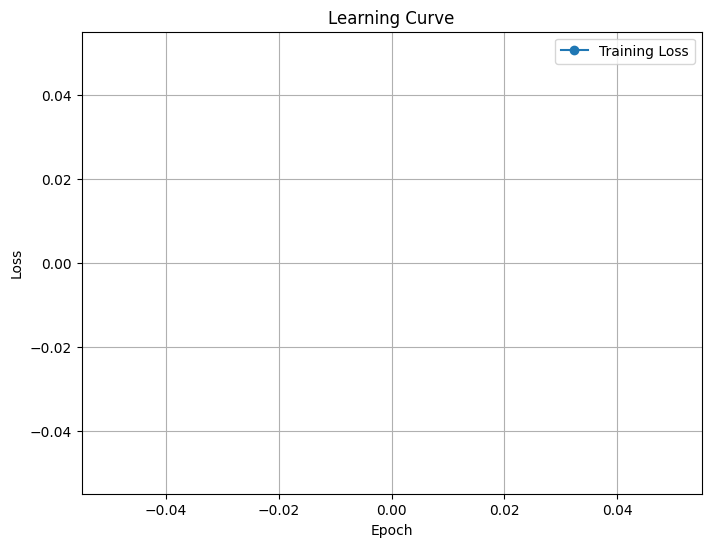

In [ ]:
train_losses = [tf.reduce_mean(loss).numpy() for loss in train_losses]

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_folder = '/content/drive/MyDrive/saved_pix2pix_slices'
model_path = os.path.join(model_folder,"trainedpix2pix.h5")
generator.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tensorflow.python.ops.init_ops_v2.RandomNormal'>, which may lead to improper serialization.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import load_model

# Specify the path to your saved model
model_path = '/content/drive/MyDrive/saved_pix2pix_slices/trainedpix2pix.h5'

# Load the model
loaded_model = load_model(model_path)

The trained generator model was successfully loaded from 'trained_generator.h5' in your Google Drive


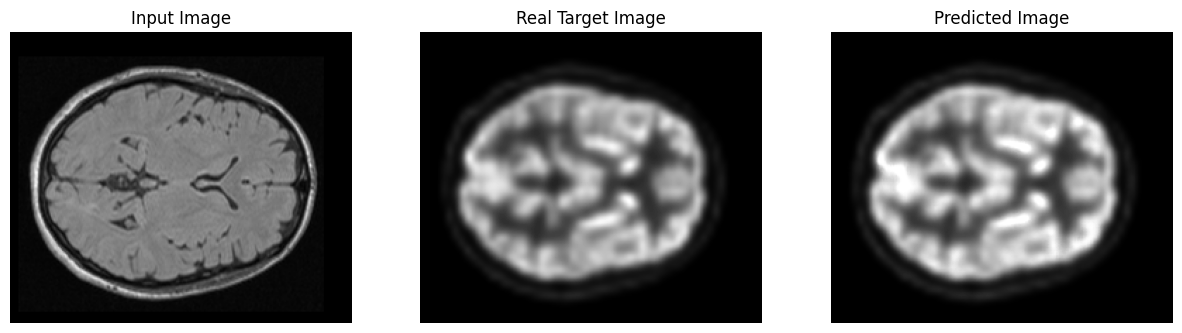

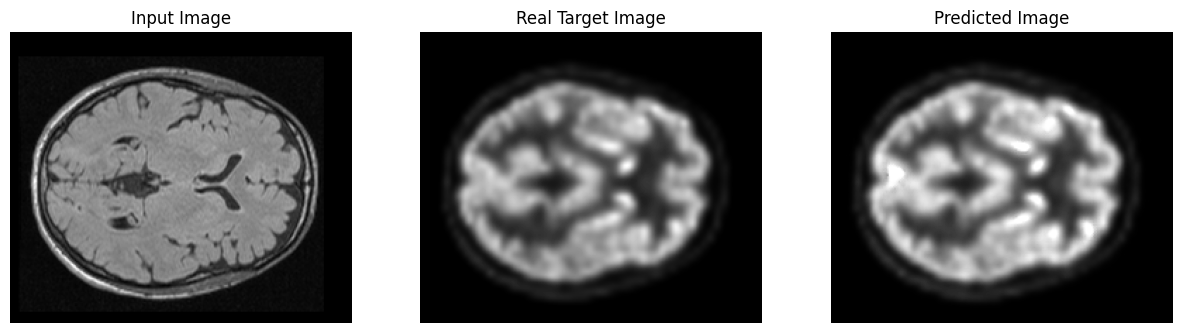

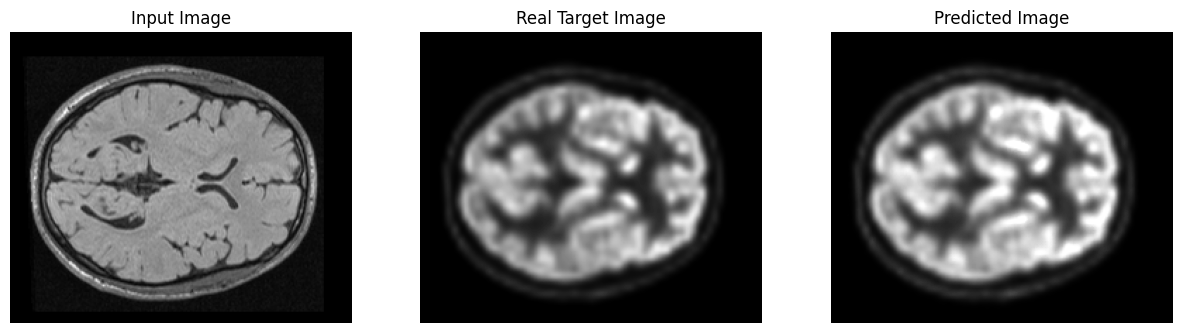

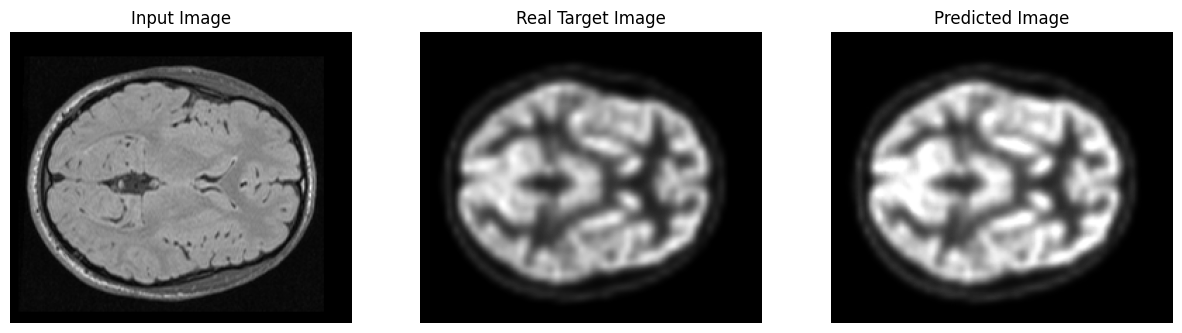

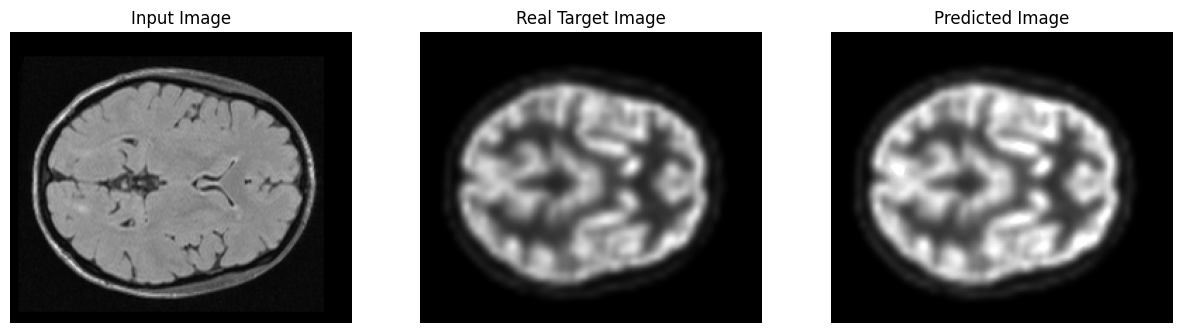

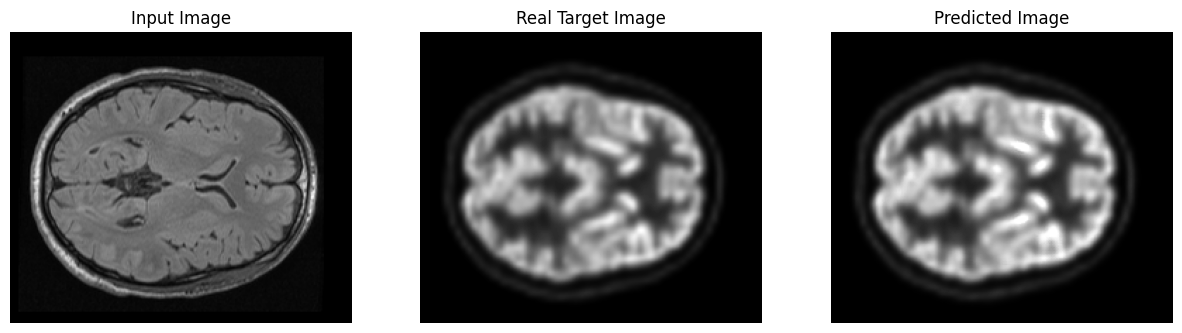

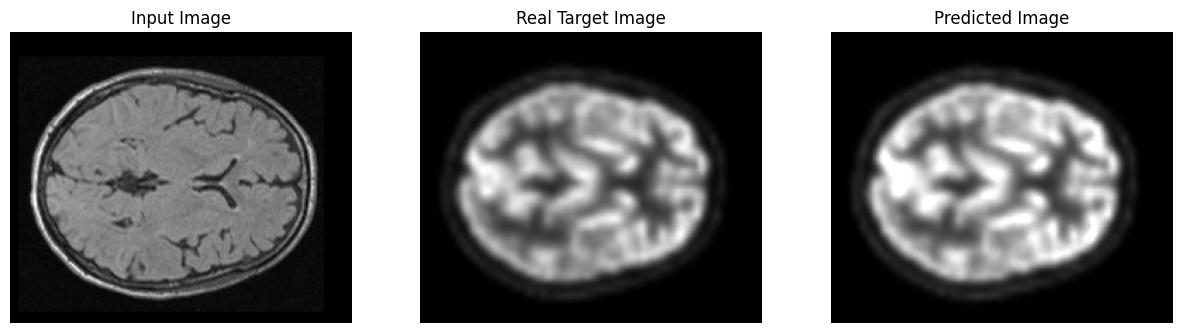

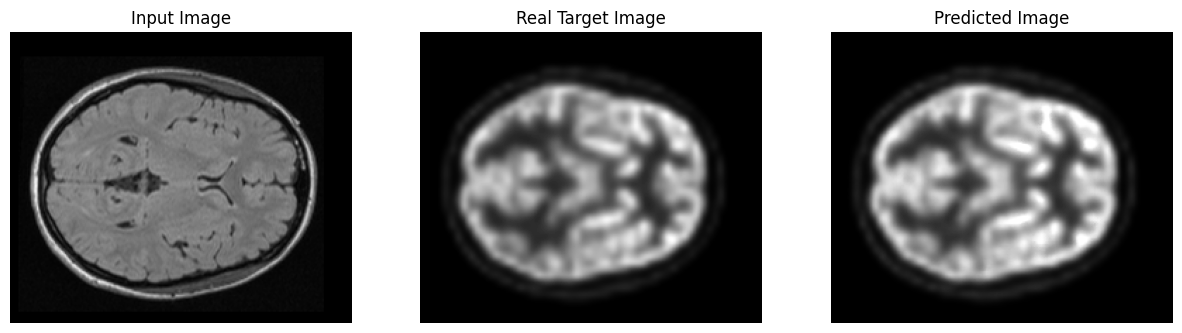

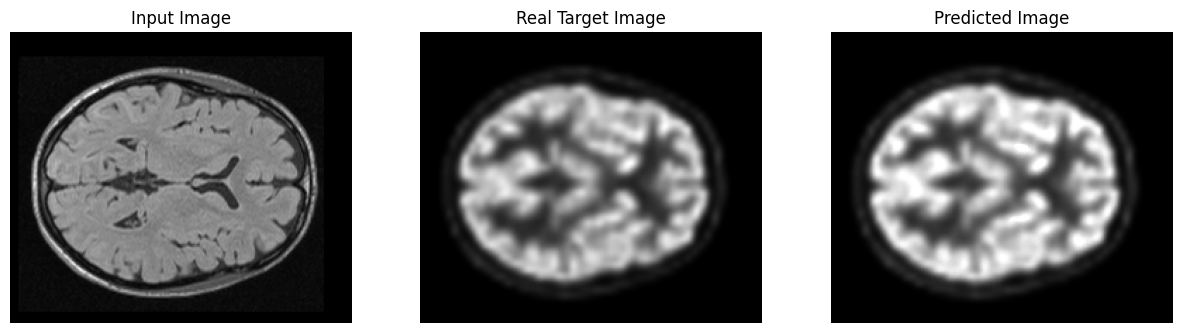

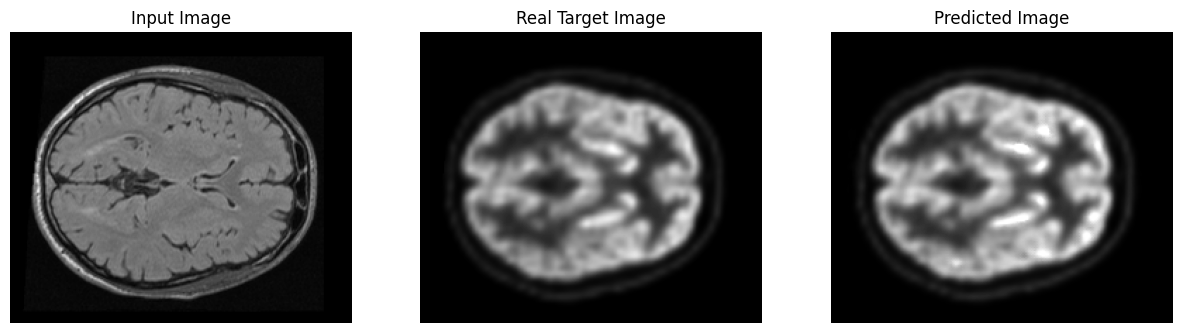

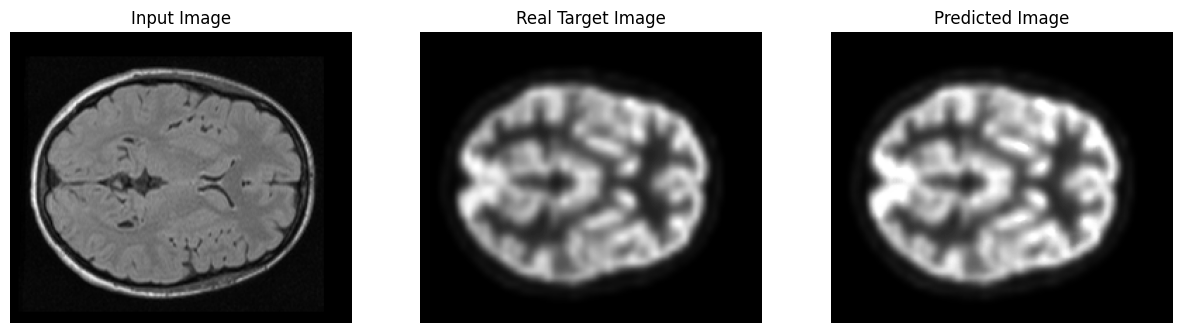

Average Mean Squared Error:  0.00013978907372802496
Average Mean Absolute Error:  0.006162924946031787


In [ ]:
# Import necessary libraries
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the model from the file in Google Drive
trained_generator = load_model('/content/drive/MyDrive/saved_pix2pix_slices/trainedpix2pix.h5')

# Print a success message
print("The trained generator model was successfully loaded from 'trained_generator.h5' in your Google Drive")

# Initialize the error metrics
mse_total = 0
mae_total = 0
num_samples = 0

# Assuming that 'file_paths_dataset_test' is your test dataset
for input_image, target in file_paths_dataset_test:
    # Generate output image from the input image
    prediction = trained_generator(input_image, training=False)

    # Calculate the error metrics
    mse = tf.keras.losses.MeanSquaredError()
    mae = tf.keras.losses.MeanAbsoluteError()
    mse_total += mse(target, prediction).numpy()
    mae_total += mae(target, prediction).numpy()
    num_samples += 1

     # Display the input image, the real target image, and the predicted image
    plt.figure(figsize=(15,5))

    plt.subplot(1, 3, 1)
    plt.title('Input Image')
    plt.imshow(input_image[0,:,:,0], cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Real Target Image')
    plt.imshow(target[0,:,:,0], cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Predicted Image')
    plt.imshow(prediction[0,:,:,0], cmap='gray')
    plt.axis('off')

    plt.show()

# Calculate the average error metrics
mse_average = mse_total / num_samples
mae_average = mae_total / num_samples

print("Average Mean Squared Error: ", mse_average)
print("Average Mean Absolute Error: ", mae_average)

In [ ]:
y_true = tf.reshape(target, [-1])  # Flatten the true labels
y_pred = tf.reshape(prediction, [-1])  # Flatten the predicted labels

accuracy = tf.reduce_sum(true_positives) / total_samples
print("Model Accuracy: {:.2%}".format(accuracy))

NameError: name 'true_positives' is not defined

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the path to the new folder where the images will be stored
new_output_folder = "/content/drive/MyDrive/saved_pix2pix_slices/results_pix2PixTEST"

# Create the new folder if it doesn't exist
if not os.path.exists(new_output_folder):
    os.makedirs(new_output_folder)

# Iterate through the test dataset and save images for each patient
for idx, (input_image, target) in enumerate(file_paths_dataset_test):
    # Generate output image from the input image
    prediction = trained_generator(input_image, training=False)

    # Resize the prediction to (208, 244)
    prediction_resized = tf.image.resize(prediction, [256, 256])

    # Create a unique folder name for each patient (starting from 1)
    patient_folder = f"sub_{idx + 27}"  # Adjust indexing here

    plt.imsave(os.path.join(new_output_folder, f"{patient_folder}_predicted.png"), prediction_resized[0, :, :, 0].numpy(), cmap='gray')

print(f"Saved images for {len(file_paths_dataset_test)} patients to {new_output_folder}")


In [ ]:
print(prediction.shape)